<a href="https://colab.research.google.com/github/PabloDome/Microcopio/blob/main/BobinasHemholtz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

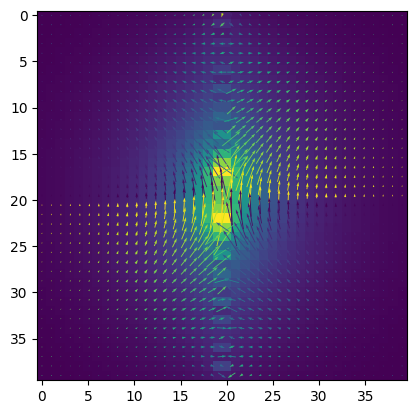

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

# Tomo el eje z como el eje de las espiras

e = 0.5 # Diametro del alambre en cm
N_bob = 10 # Cantidad de espiras en el plano xy
N_z = 1 # Cantidad de espiras en el eje z
Rad_bob = 1 # Radio de la bobina interna en cm
Pos_max = 6 #Distancia maxima de zoneo en cm
Tam = 40 #Tamaño de la discretización del espacio
I = 1 # Corriente en A

B_x = np.zeros((Tam,Tam))
B_z = np.zeros((Tam,Tam))
B_punto = np.zeros(3)

def BitSabart(I, r, r_bob, Radio_bob): #Es necesario que Radio_bob este en m
  # Por practicidad voy a calcular el campo en xz, pero agregando la linea comentada se puede hacer en 3d
  theta = np.linspace(0, 2*np.pi, num=100, endpoint=True) # num es la cantidad de divisiones de integración
  Bx = pow(10,-7)*I*np.trapz((r_bob[2]-r[2])*np.cos(theta)/pow((pow(-r[0]+r_bob[0]+Radio_bob*np.cos(theta),2)+pow(-r[1]+r_bob[1]+Radio_bob*np.sin(theta),2)+pow(-r[2]+r_bob[2],2)),3/2), theta)
  #By = pow(10,-7)*I*np.trapz((r_bob[2]-r[2])*np.sin(theta)/pow((pow(-r[0]+r_bob[0]+Radio_bob*np.cos(theta),2)+pow(-r[1]+r_bob[1]+Radio_bob*np.sin(theta),2)+pow(-r[2]+r_bob[2],2)),3/2), theta)
  Bz = pow(10,-7)*I*np.trapz(((r_bob[1]-r[1])*np.sin(theta)+(r_bob[0]-r[0])*np.cos(theta)+Radio_bob)/pow((pow(-r[0]+r_bob[0]+Radio_bob*np.cos(theta),2)+pow(-r[1]+r_bob[1]+Radio_bob*np.sin(theta),2)+pow(-r[2]+r_bob[2],2)),1.5), theta)

  B = np.array([Bx, 0, Bz])

  return B


def Espira_punto(N_bob, N_z, r, r_bob):

  B_p = B_punto*0

  r_0 = r
  r_bob_0 = r_bob

  for i in range(N_bob):
    a = (Rad_bob+i*e)/100
    for j in range(N_z):
      r_bob[2] = j*(e/100)
      B_p = B_p + BitSabart(I, r, r_bob, a)

  return  B_p


def Bobina():
  B_x = np.zeros((Tam,Tam))
  B_z = np.zeros((Tam,Tam))
  Distancia_bobs = Rad_bob*0.5/100   #Posición de la espira en cm
  r_bob = np.array([0, 0, Distancia_bobs])

  for i in range(Tam):
    for j in range(Tam):
      r = np.array([(i-(Tam-1)*0.5)*2*(Pos_max/100)/Tam, 0, (j-(Tam-1)*0.5)*2*(Pos_max/100)/Tam])
      B_punto = Espira_punto(N_bob, N_z, r, r_bob)
      B_x[i,j] = B_punto[0]
      B_z[i,j] = B_punto[2]

  return B_x, B_z

B_x, B_z = Bobina()
B_x_2 = B_x.transpose()
B_z_2 = B_z.transpose()

Btot_x = 0*B_x_2 + B_x
Btot_z = 0*B_z_2 + B_z
#x, y = np.meshgrid(np.linspace(-Pos_max, Pos_max, Tam), np.linspace(-Pos_max, Pos_max, Tam))
x, y = np.meshgrid(np.linspace(0, Tam, Tam), np.linspace(0, Tam, Tam))
plt.quiver(x, y, Btot_x, Btot_z, np.arctan(Btot_z/Btot_x), pivot='mid',color='g')

plt.imshow(np.sqrt(Btot_x*Btot_x+Btot_z*Btot_z))
